In [58]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

from agents import SatisfiaAgent
from games import JOBST_GAME
from monte_carlo import combined_strategies
from network import SatisfiaMaximiserNetwork

In [5]:
%load_ext autoreload
%autoreload 2

# Testing the impact of the type of connectivity on SatisfIA survival

### **Ojective**
> We want to test networks with similar parameters, but with different connectivity types:
> - Fully Connected
> - Strogatz Small World
> - Barabasi

Visualizing the graph types

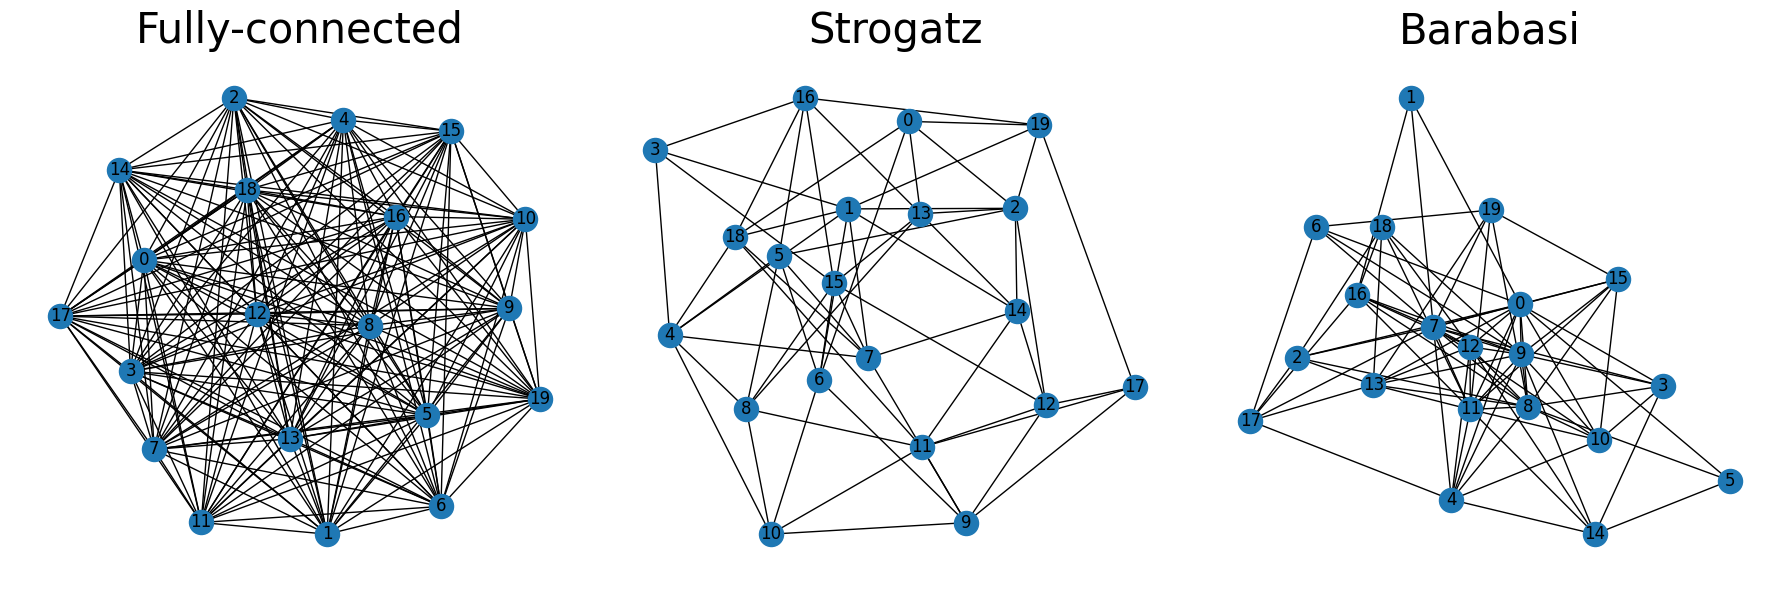

In [54]:
n_agents = 20
edges_per_node = 6

fc_graph_ex = nx.complete_graph(n_agents)
strogatz_graph_ex = nx.watts_strogatz_graph(n=n_agents, k=edges_per_node, p=0.5)
barabasi_graph_ex = nx.barabasi_albert_graph(n=n_agents, m=edges_per_node)


fig, axs = plt.subplots(1, 3, figsize=(18, 6))

nx.draw(fc_graph_ex, ax=axs[0], with_labels=True)
axs[0].set_title('Fully-connected', fontsize=30)

# pos = nx.circular_layout(strogatz_graph)
nx.draw(strogatz_graph_ex, ax=axs[1], with_labels=True)
axs[1].set_title('Strogatz', fontsize=30)

nx.draw(barabasi_graph_ex, ax=axs[2], with_labels=True)
axs[2].set_title('Barabasi', fontsize=30)
plt.tight_layout()

### __Hypothesis__
> We expect the following patterns for SatisfIA:
> - FullyConnected: quick extinction if small initial proportion because there are lots of interactions with Maximisers at the beginning
> - Small world: ??
> - Barabasi: ??

## Experiment

General parameters

In [141]:
N_AGENTS = 50
EDGES_PER_NODE = 2

SATISFIA_SHARE = 0.4
N_GENERATIONS = 2000

P_PLAY_GAME = 1
P_SOCIAL_LEARNING = 1

SEED = 42

### A) Fully connected Graph

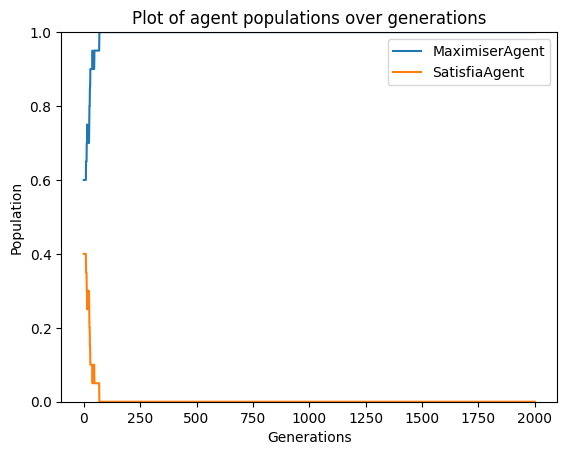

In [142]:
fc_graph = nx.complete_graph(n_agents)
simulator = SatisfiaMaximiserNetwork(JOBST_GAME, combined_strategies, 
                                     satisfia_share=SATISFIA_SHARE, 
                                     generations=N_GENERATIONS, 
                                     base_graph=fc_graph, 
                                     draw_network_interval=N_GENERATIONS // 5)
simulator.iterate_generations(P_PLAY_GAME, P_SOCIAL_LEARNING, plot=True)

## B) Strogatz graph

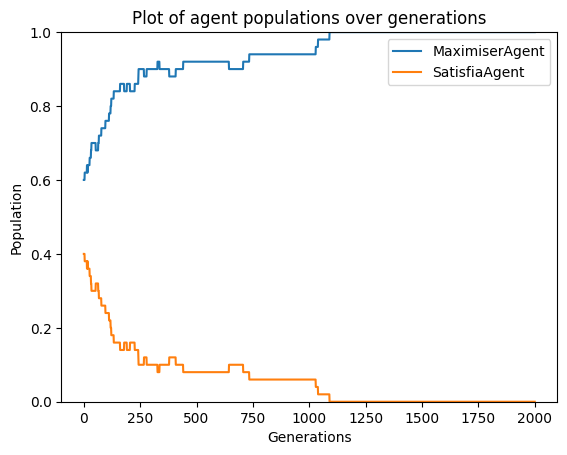

In [161]:
strogatz_graph = nx.watts_strogatz_graph(n=N_AGENTS, k=EDGES_PER_NODE, p=1, seed=SEED)
simulator = SatisfiaMaximiserNetwork(JOBST_GAME, combined_strategies,
                                     satisfia_share=SATISFIA_SHARE,
                                     generations=N_GENERATIONS,
                                     base_graph=strogatz_graph, 
                                     draw_network_interval=N_GENERATIONS // 5)
simulator.iterate_generations(P_PLAY_GAME, P_SOCIAL_LEARNING, plot=True)

## C) Barabasi graph

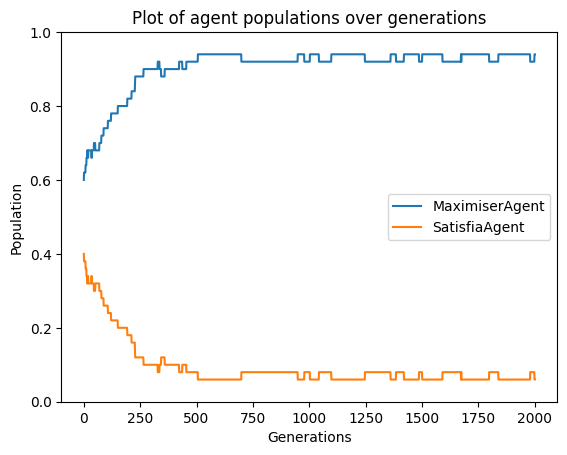

In [177]:
barabasi_graph = nx.barabasi_albert_graph(n=N_AGENTS, m=EDGES_PER_NODE, seed=SEED)
simulator = SatisfiaMaximiserNetwork(JOBST_GAME, combined_strategies,
                                     satisfia_share=SATISFIA_SHARE,
                                     generations=N_GENERATIONS,
                                     base_graph=strogatz_graph, 
                                     draw_network_interval=N_GENERATIONS // 5)
simulator.iterate_generations(P_PLAY_GAME, P_SOCIAL_LEARNING, plot=True)

# Conclusion

### A) Fully Connected Graph

As expected, extinction of SatisfIA is quick because of the high connectivtity.

### b) Strogatz Graph
Decay of the SatisfIA, more or less rapid.  
**Very high variability across simulations**  
I couldn't find a clear influence of the p parameter of the Strogatz graph (probability of rewiring during network construction)

### C) Barabasi Graph
No extinction, stabilization after 200 generations  
**Very high variability**  
Similar to Strogatz: extinction of the SatisfIA